In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
# НС С 1 слоем
def sigmoid(x):
  # Наша функция активации: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Умножаем входы на веса, прибавляем порог, затем используем функцию активации
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([1, 0]) # w1 = 1, w2 = 0
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.997


0.9975273768433653


In [ ]:
#Нейронная сеть с:  2 входами, скрытым слоем с 2 нейронами (h1, h2) и выходным слоем с 1 нейроном (o1)
#Все нейроны имеют одинаковые веса и пороги: w = [0, 1] и  b = 0

class OurNeuralNetwork:

  def __init__(self):
    weights = np.array([1, 0])
    bias = 0

    # Используем класс Neuron из предыдущего раздела
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # Входы для o1 - это выходы h1 и h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.706

0.7069873680001046


In [ ]:
# размер выборки
sample_volume = 80
# обучающая выборка
x = np.random.uniform(-1, 1.5, (sample_volume,1))
y_true = np.sin(3*x)/2.5 + 0.5
y = y_true + np.random.normal(0, 0.05, (sample_volume,1))
n = 1
L = [3, 2]
#Для вычислений необходимо знать полную структуру, сколько элементов на каждом слое: входной, скрытые, выходной
nn_structure = np.array([n])
nn_structure = np.hstack([nn_structure, L])
nn_structure = np.hstack([nn_structure, 1])
num_layers = nn_structure.shape[0]
print("Число всех слоев:", num_layers)
print("Число элементов на всех слоях:",nn_structure)

Число всех слоев: 4
Число элементов на всех слоях: [1 3 2 1]


In [ ]:
#Функция вычисления сигмоиды в скрытых слоях
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
#Случайная инициализация весов небольшими значениями равномерно в интервале  [−1,1] .
#Существуют методы инициализации с учетом размеров слоев и типа функции активации.
weights = []
for i in range(num_layers-1):
  weights.append( np.random.uniform(-1,1,
                (nn_structure[i]+1, nn_structure[i+1])) )
  if i != (num_layers-2):
    print("Матрица весов слоя",(i+1),weights[i].shape)
  else:
    print("Матрица весов выходного слоя",weights[i].shape)
print("\nЗначения весов:")
weights

Матрица весов слоя 1 (2, 3)
Матрица весов слоя 2 (4, 2)
Матрица весов выходного слоя (3, 1)

Значения весов:


[array([[ 0.7440435 , -0.94467903,  0.63174163],
        [ 0.34056343,  0.86397954, -0.44009701]]),
 array([[-0.92514195,  0.2183924 ],
        [-0.94633812, -0.19094489],
        [-0.95329979, -0.40673627],
        [-0.99321916, -0.5345856 ]]),
 array([[-0.5311093 ],
        [ 0.19469209],
        [-0.579847  ]])]

In [ ]:
#Прямой проход
#На каждом слое надо добавить фиктивный вход с постоянным значением (обычно равно  1 ), веса этого входа - это веса смещения.
inputs = []
inputs.append( np.hstack([x, np.ones((sample_volume,1))]) )
print("Первые 3 примера входных данных 1го слоя (от входа на 1й слоя)")
print(inputs[0][0:3])

Первые 3 примера входных данных 1го слоя (от входа на 1й слоя)
[[0.91299702 1.        ]
 [0.25423878 1.        ]
 [0.05085194 1.        ]]


In [ ]:
#Умножим входы на веса, получим для каждого примера суммы для 3х нейронов скрытого слоя 1.
sum = []
sum.append( np.dot(inputs[0], weights[0]) )
print(sum[0][0:3])

[[ 1.01987292  0.0014904   0.13668122]
 [ 0.52972814  0.6238055  -0.27948379]
 [ 0.37839948  0.81594078 -0.40797172]]


In [ ]:
#Выходы нейронов 1го слоя как результат вычисления функций активации (в данном примере сигмоидов) для каждого примера.
outputs = []
outputs.append( sigmoid(sum[0]) )
print(outputs[0][0:3])

[[0.73494785 0.5003726  0.53411721]
 [0.6294197  0.65108356 0.43058034]
 [0.59348702 0.693374   0.39939856]]


In [ ]:
 #Зная выходы нейронов, можно сказу же вычислить и производные. Для сигмоида это:  o′(x)=o⋅(1−o)
 drvs = []
 drvs.append( outputs[0]*(1-outputs[0]) )

In [ ]:
#Аналогично делаем вычисления для 2го слоя, входами будут предыдущие выходы с добавленеим фиктивного входа для весов смещения.
inputs.append( np.hstack([outputs[0], np.ones((sample_volume,1))]) )
sum.append( np.dot(inputs[1], weights[1]) )
outputs.append( sigmoid(sum[1]) )
drvs.append( outputs[1]*(1-outputs[1]) )
print(outputs[1][0:3])

[[0.06562962 0.33473039]
 [0.06900088 0.33257118]
 [0.07048967 0.33185244]]


In [ ]:
#И также для выходного слоя
inputs.append( np.hstack([outputs[1], np.ones((sample_volume,1))]) )
sum.append( np.dot(inputs[2], weights[2]) )
outputs.append( sigmoid(sum[2]) )
drvs.append( outputs[2]*(1-outputs[2]) )
print(outputs[2][0:3])

[[0.3659725 ]
 [0.36545964]
 [0.36524386]]


In [ ]:
#Зная значения на выходном слое (прогноз сети, ответы), можно сранить их с истинными значениям в выборке и рассчитать ошибку.
print("MSE =", mean_squared_error(y, outputs[2]))

MSE = 0.0845654220464283


In [ ]:
#Зная структуру НС, проход можно сделать в цикле.
inputs = []
outputs = []
drvs = []
sum = []
for i in range(num_layers-1):
  if(i == 0):
    inputs.append( np.hstack([x, np.ones((sample_volume,1))]) )
  else:
    inputs.append( np.hstack([outputs[i-1], np.ones((sample_volume,1))]) )
  sum.append( np.dot(inputs[i], weights[i]) )
  outputs.append( sigmoid(sum[i]) )
  drvs.append( outputs[i]*(1-outputs[i]) )

print("MSE =", mean_squared_error(y, outputs[num_layers-2]))

MSE = 0.0845654220464283


In [ ]:
#Изменения весов выходного слоя включают ошибку (разницу между ответом и истинным значением) умноженные на производную этого слоя.
#Обратный проход
delta3 = (outputs[2] - y) * drvs[2]
delta3[0:3]

array([[-0.07144487],
       [-0.08338755],
       [-0.04266755]])

In [ ]:
#Дельты следующих слоев получаются путем умнажения предыдущих дельт на веса слоя. Результат умножить на производную слоя, для которого считается дельта, исключив дельты на входах с постоянным значением равным 1.
delta2 = np.dot(delta3, weights[2].T)[:,0:2] * drvs[1]
delta2[0:3]

array([[ 0.00232688, -0.00309751],
       [ 0.00284504, -0.00360362],
       [ 0.00148478, -0.00184189]])

In [ ]:
delta1 = np.dot(delta2, weights[1].T)[:,0:3]*drvs[0]
delta1[0:3]

array([[-0.00055112, -0.00040264, -0.00023847],
       [-0.0007975 , -0.00045532, -0.00030561],
       [-0.00042845, -0.00022396, -0.00015983]])

In [ ]:
#Для изменения весов из старого значения веса вычитается (минус - направление обратное градиенту) произведение дельты на входы данного слоя и на параметр скорости обучения.
learning_rate = 0.5
print("Старые веса:\n", weights[2])
weights[2] = weights[2] - learning_rate * np.dot(inputs[2].T, delta3)
print("Новые веса:\n", weights[2])

Старые веса:
 [[ 0.98774363]
 [-0.11345812]
 [ 0.27213355]]
Новые веса:
 [[ 0.32300219]
 [-1.21628662]
 [-1.4748985 ]]


In [ ]:
print("Старые веса:\n", weights[1])
weights[1] = weights[1] - learning_rate * np.dot(inputs[1].T, delta2)
print("Новые веса:\n", weights[1])

Старые веса:
 [[-0.52380489 -0.71707199]
 [-0.75164804  0.38606895]
 [-0.55473858 -0.26581887]
 [ 0.32898386  0.71144231]]
Новые веса:
 [[-0.6681748  -0.70062496]
 [-0.95887037  0.40973745]
 [-0.73291368 -0.24558888]
 [-0.07624633  0.75754102]]


In [ ]:
print("Старые веса:\n", weights[0])
weights[0] = weights[0] - learning_rate * np.dot(inputs[0].T, delta1)
print("Новые веса:\n", weights[0])

Старые веса:
 [[-0.24229016 -0.97635019  0.35717816]
 [-0.61828346 -0.0811889  -0.21737791]]
Новые веса:
 [[-0.24804985 -0.99243351  0.35369614]
 [-0.57759832 -0.01267326 -0.16634237]]


In [ ]:
#Обратный проход целиком
learning_rate = 0.5

delta = []
for i in reversed(range(num_layers-1)):
  if i == (num_layers-2):
    delta.append( (y - outputs[i]) * drvs[i] )
  else:
    delta.append( np.dot(delta[num_layers-3-i],
                         weights[i+1].T)[:,0:nn_structure[i+1]] * drvs[i] )

for i in range(num_layers-1):
  weights[i] = weights[i] - learning_rate * np.dot(inputs[i].T, delta[num_layers-i-2])

In [ ]:
def rand_weights(nn_structure):
  num_layers = nn_structure.shape[0]
  weights = []
  for i in range(num_layers-1):
    weights.append( np.random.uniform(-1,1,
                  (nn_structure[i]+1, nn_structure[i+1])) )
  return weights

In [ ]:
def forward(x, weights, nn_structure):
  inputs = []
  outputs = []
  drvs = []
  sum = []

  num_layers = nn_structure.shape[0]

  for i in range(num_layers-1):
    if(i == 0):
      inputs.append( np.hstack([x, np.ones((sample_volume,1))]) )
    else:
      inputs.append( np.hstack([outputs[i-1], np.ones((sample_volume,1))]) )
    sum.append( np.dot(inputs[i], weights[i]) )
    outputs.append( sigmoid(sum[i]) )
    drvs.append( outputs[i]*(1-outputs[i]) )

  return inputs, outputs, drvs

In [ ]:
def backward(targets, weights, nn_structure, inputs, outputs, drvs, learning_rate):
  delta = []

  num_layers = nn_structure.shape[0]

  for i in reversed(range(num_layers-1)):
    if i == (num_layers-2):
      delta.append( (outputs[i] - targets) * drvs[i] )
    else:
      delta.append( np.dot(delta[num_layers-3-i],
                          weights[i+1].T)[:,0:nn_structure[i+1]] * drvs[i] )

  for i in range(num_layers-1):
    weights[i] = weights[i] - learning_rate * np.dot(inputs[i].T, delta[num_layers-i-2])/80

  return weights

In [ ]:
weights_ = rand_weights(nn_structure)
inputs_, outputs_, drvs_ = forward(x, weights_, nn_structure)
error = []

learning_rate = 0.5

for i in range(20000):
  weights_ = backward(y, weights_, nn_structure, inputs_, outputs_, drvs_, learning_rate)
  inputs_, outputs_, drvs_ = forward(x, weights_, nn_structure)
  error.append(mean_squared_error(y, outputs_[num_layers-2]))
  if (i+1)%1000 == 0:
    print("epoch =", i+1, " MSE =", mean_squared_error(y, outputs_[num_layers-2]) )

epoch = 1000  MSE = 0.07697857454737689
epoch = 2000  MSE = 0.07554949462596725
epoch = 3000  MSE = 0.0698601260366694
epoch = 4000  MSE = 0.05644228140585237
epoch = 5000  MSE = 0.04962390256951845
epoch = 6000  MSE = 0.04680011082453793
epoch = 7000  MSE = 0.04426476930312016
epoch = 8000  MSE = 0.03986038646212433
epoch = 9000  MSE = 0.029280012880824036
epoch = 10000  MSE = 0.01484076609007925
epoch = 11000  MSE = 0.00853045074485739
epoch = 12000  MSE = 0.00666249943564125
epoch = 13000  MSE = 0.006081981855813081
epoch = 14000  MSE = 0.005880459564851735
epoch = 15000  MSE = 0.005800835722158018
epoch = 16000  MSE = 0.005763852708559696
epoch = 17000  MSE = 0.00574300777653731
epoch = 18000  MSE = 0.005728805799702643
epoch = 19000  MSE = 0.005717633514912254
epoch = 20000  MSE = 0.005708037881719323


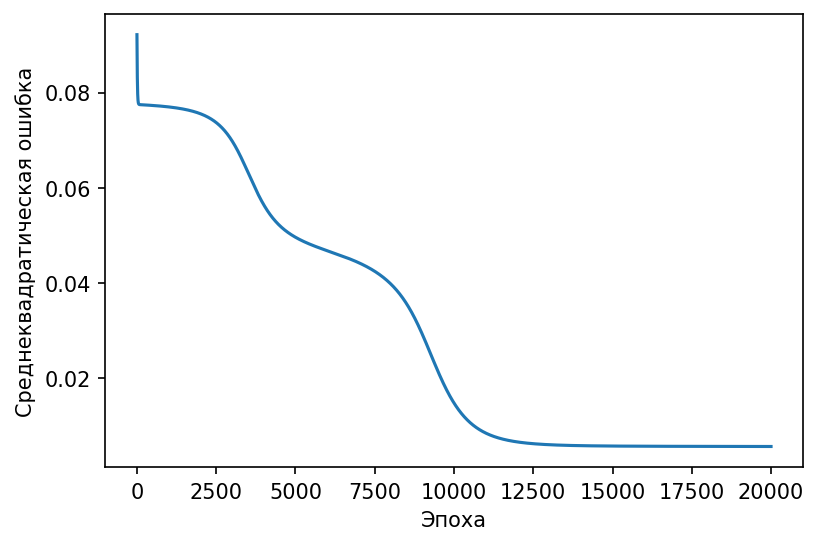

In [ ]:
fig, ax = plt.subplots(dpi=150)
ax.plot(error)
ax.set_xlabel('Эпоха')
ax.set_ylabel('Среднеквадратическая ошибка')
plt.show()